# Train Toy Model

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
import tensorflow as tf

RAW_DATA_PATH = 'input/data/'

MINITRAIN_PATH = 'input/toy/train/'
MINIVAL_PATH = 'input/toy/val/'
MINITEST_PATH = 'input/toy/test/'

META_PATH = 'input/metadata/'
IMG_SIZE = 256
N_CHANNELS = 3

print('GPU name: ', tf.config.experimental.list_physical_devices('GPU'))

2023-09-29 15:02:40.133463: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-29 15:02:40.156486: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-29 15:02:40.510568: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


GPU name:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-09-29 15:02:42.252339: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-29 15:02:42.267405: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-29 15:02:42.267502: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [2]:
train_data = np.load(os.path.join(MINITRAIN_PATH, 'train.npz'))
X_train, y_train = train_data['X'], train_data['y']
output_shape = np.unique(y_train).shape[0]
print(X_train.shape, y_train.shape)

val_data = np.load(os.path.join(MINIVAL_PATH, 'val.npz'))
X_val, y_val = val_data['X'], val_data['y']
print(X_val.shape, y_val.shape)

test_data = np.load(os.path.join(MINITEST_PATH, 'test.npz'))
X_test, y_test = test_data['X'], test_data['y']
print(X_test.shape, y_test.shape)

(1400, 256, 256, 3) (1400,)
(560, 256, 256, 3) (560,)
(1400, 256, 256, 3) (1400,)


In [14]:
from tensorflow import keras

layers = [
    keras.Input(shape=(IMG_SIZE, IMG_SIZE, N_CHANNELS)),
    keras.layers.Rescaling(1./255.),
    # keras.layers.Dropout(0.8),
    keras.layers.Conv2D(16,(3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size = (4,4)),

    # keras.layers.Dropout(0.8),
    keras.layers.Conv2D(128,(3,3), activation = 'relu'),
    keras.layers.Dropout(0.8),
    keras.layers.MaxPooling2D(pool_size = (4,4)),

    keras.layers.Flatten(),
    keras.layers.Dropout(0.8),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(output_shape, activation='softmax')
]

model = keras.Sequential(layers)
'''
sparse_categorical_crossentropy para cuando las categorias vienen en una unica columna
categorical_crossentropy para cuando las categorias vienen en formato dummy
'''
model.compile(optimizer=keras.optimizers.legacy.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 63, 63, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 61, 61, 128)       18560     
                                                                 
 dropout_28 (Dropout)        (None, 61, 61, 128)       0         
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 15, 15, 128)       0         
 ng2D)                                                

In [15]:
model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_val, y_val))

Epoch 1/100
 33/175 [====>.........................] - ETA: 0s - loss: 3.7826 - accuracy: 0.0227 

2023-09-29 15:10:17.977776: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_6/dropout_28/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


175/175 [==============================] - 1s 6ms/step - loss: 3.4361 - accuracy: 0.0307 - val_loss: 3.3308 - val_accuracy: 0.0571
Epoch 2/100
175/175 [==============================] - 1s 5ms/step - loss: 3.2909 - accuracy: 0.0600 - val_loss: 3.2910 - val_accuracy: 0.0911
Epoch 3/100
175/175 [==============================] - 1s 6ms/step - loss: 3.2232 - accuracy: 0.0793 - val_loss: 3.2494 - val_accuracy: 0.1054
Epoch 4/100
175/175 [==============================] - 1s 5ms/step - loss: 3.1192 - accuracy: 0.1229 - val_loss: 3.1948 - val_accuracy: 0.1446
Epoch 5/100
175/175 [==============================] - 1s 6ms/step - loss: 2.9175 - accuracy: 0.1507 - val_loss: 3.0749 - val_accuracy: 0.2304
Epoch 6/100
175/175 [==============================] - 1s 6ms/step - loss: 2.6195 - accuracy: 0.2321 - val_loss: 2.9710 - val_accuracy: 0.2625
Epoch 7/100
175/175 [==============================] - 1s 6ms/step - loss: 2.3561 - accuracy: 0.3029 - val_loss: 2.8568 - val_accuracy: 0.3250
Epoch 8/100

<Axes: >

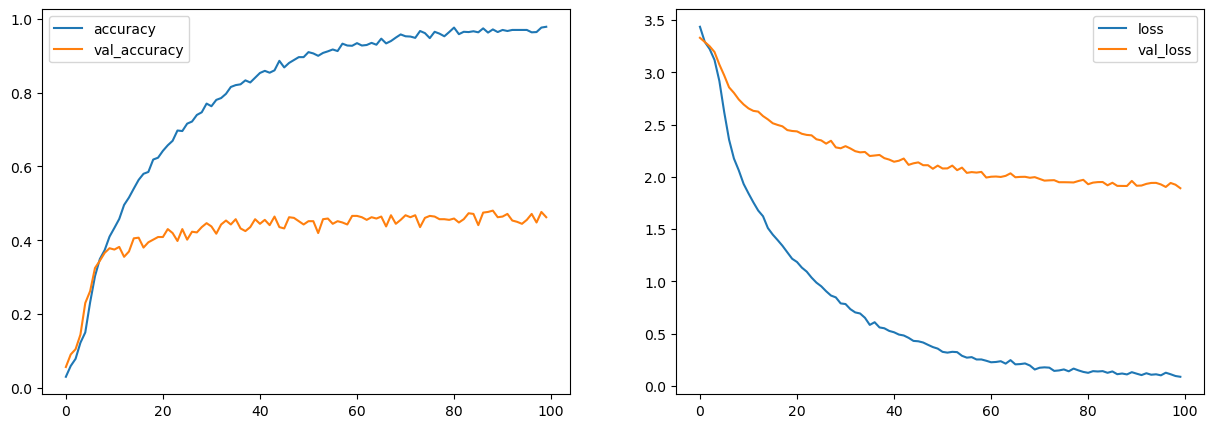

In [16]:
df_hist = model.history.history
df_hist = pd.DataFrame(df_hist)

fig, ax = plt.subplots(1,2, figsize=(15,5))
df_hist[['accuracy', 'val_accuracy']].plot(ax=ax[0])
df_hist[['loss', 'val_loss']].plot(ax=ax[1])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator#, load_img
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    MINITRAIN_PATH, 
    x_col='filename',
    y_col='category',
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    class_mode='binary',
    batch_size=BATCH_SIZE
)